In [111]:


%load_ext autoreload
%autoreload 2

from pathlib import Path
from dnafiber import get_model
import cv2
import torch
import numpy as np
from dnafiber.inference import preprocess_image

from matplotlib.colors import ListedColormap

from pathlib import Path

import numpy as np
import pandas as pd
from bokeh.io import output_file, output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import GnBu3, OrRd3
from bokeh.plotting import figure
from scipy.stats import wilcoxon

from dnafiber import get_model
from dnafiber.data.intergrader import BLIND_MAPPING, REVERSE_BLIND_MAPPING
from dnafiber.data.intergrader.analysis import (
    extract_fiber_properties,
    extract_properties_from_datadict,
    skeletonize_data_dict,
)
from skimage.segmentation import expand_labels
from dnafiber.data.intergrader.io import read_mask_from_path_gens
from dnafiber.data.intergrader.plot import imshow_compare
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
root = Path("C:/Users/cleme/Documents/Projects/DNAFiber/to_label_v1/Clement/common")
all_files = list(root.rglob("*/*.jpeg"))
all_files = sorted(all_files, key=lambda x: x.stem)[:-1]
model = get_model().cuda()
model.eval()

output = dict()
for i, file in enumerate(all_files):
    img_type  = REVERSE_BLIND_MAPPING[file.parent.stem]
    img = cv2.imread(str(file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    maxs = img.max(axis=(0, 1))
    normalized = img.astype(np.float32) / (maxs[None, None, :])
    normalized[:,:, -1] = 0
    tensor = preprocess_image(normalized).float().cuda()
    with torch.no_grad():
        pred = model(tensor)
    pred = pred.argmax(1).squeeze().cpu().numpy()
    pred = expand_labels(pred, 1)
    # fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # axs[0].imshow(img)
    # axs[0].set_title(f"{file.parent.stem} {file.stem}")
    # axs[1].imshow(pred, cmap=ListedColormap(['black', 'red', 'green']), interpolation="nearest")
    # plt.show()
    if img_type not in output:
        output[img_type] = []
    output[img_type].append(pred)


In [114]:
root_clement = "C:/Users/cleme/OneDrive/PostDoc/data/labelled/DNAFiber_Clement/export/colormaps/local/common"
root_yosra = "C:/Users/cleme/OneDrive/PostDoc/data/labelled/Yosra/export/colormaps/local/common"
root_hugo = "C:/Users/cleme/OneDrive/PostDoc/data/labelled/Hugo/export/colormaps/local/common"
root_santiago = "C:/Users/cleme/OneDrive/PostDoc/data/labelled/Santiago/export/colormaps/local/common"

yosra_files = list(Path(root_yosra).rglob("*/*.png"))
clement_files = list(Path(root_clement).rglob("*/*.png"))
hugo_files = list(Path(root_hugo).rglob("*/*.png"))
santiago_files = list(Path(root_santiago).rglob("*/*.png"))

yosra_files = sorted(yosra_files, key=lambda x: x.stem)[:-1]
clement_files = sorted(clement_files, key=lambda x: x.stem)[:-1]
hugo_files = sorted(hugo_files, key=lambda x: x.stem)[:-1]
santiago_files = sorted(santiago_files, key=lambda x: x.stem)[:-1]

dict_gens = {
    "S": santiago_files,
    "H": hugo_files,
    "Y": yosra_files,
    "C": clement_files,

}
annotators = read_mask_from_path_gens(dict_gens, REVERSE_BLIND_MAPPING)
annotators['IA'] = output

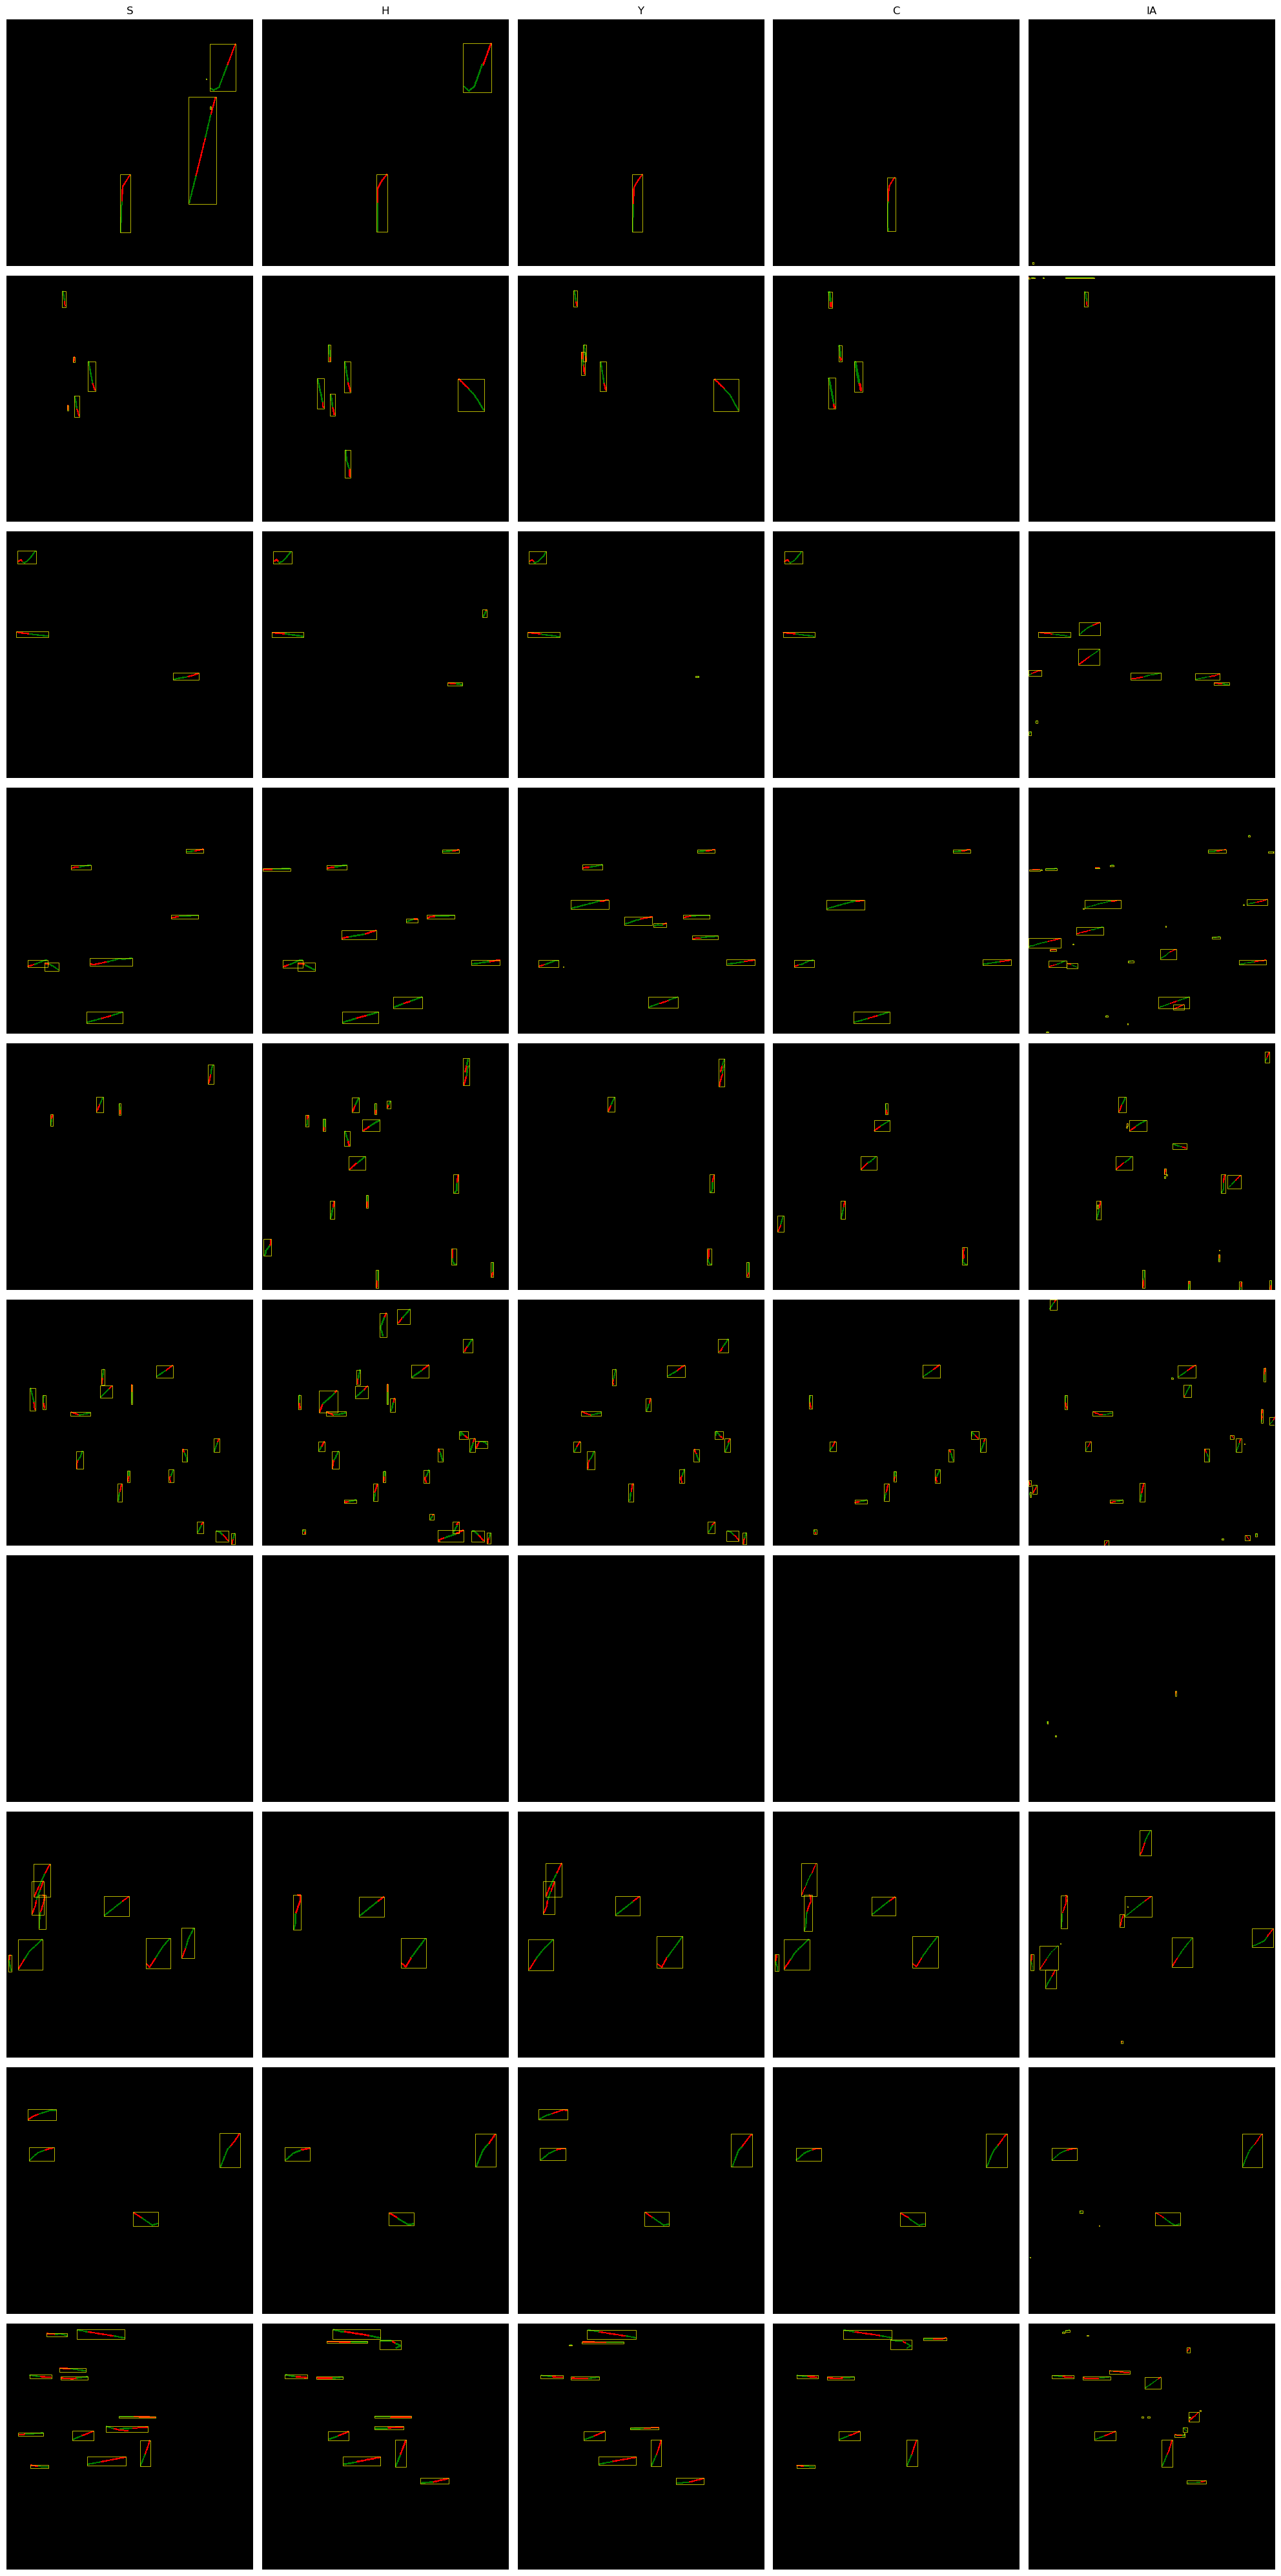

In [115]:
fig, axes = imshow_compare(annotators, draw_bbox=True, max_images=10, ax_size=4)


In [ ]:
skeletons = skeletonize_data_dict(annotators)
properties = extract_properties_from_datadict(skeletons)
df = pd.DataFrame.from_dict(properties)
df['common'] = df['S'].astype(int) + df['H'].astype(int) + df['Y'].astype(int) + df['C'].astype(int)  + df['IA'].astype(int) 

df.to_pickle("properties_with_IA.pkl")



: 

In [ ]:
annotators['IA'].keys(), annotators['S'].keys()

(dict_keys(['siMMS22L_+dox-01', 'siBRCA2+SMARCAL KO-04', 'HLTF ko+si MMS22L-01', 'HLTF ko+si MMS22L-02', 'siBRCA2+SMARCAL KO-03', 'siTONSL-03', 'siMMS22L_+dox-02', 'siB+M-04', 'siBRCA2-02', 'siNT-02', 'siBRCA2-03', 'siBRCA2-01', '59_siBRCA2-02']),
 dict_keys(['siMMS22L_+dox-01', 'siBRCA2+SMARCAL KO-04', 'HLTF ko+si MMS22L-01', 'HLTF ko+si MMS22L-02', 'siBRCA2+SMARCAL KO-03', 'siTONSL-03', 'siMMS22L_+dox-02', 'siB+M-04', 'siBRCA2-02', 'siNT-02', 'siBRCA2-03', 'siBRCA2-01', '59_siBRCA2-02']))

In [ ]:
    # axs[1].imshow(pred, cmap=ListedColormap(['black', 'red', 'green']), interpolation="nearest")


[WindowsPath('C:/Users/cleme/Documents/Projects/DNAFiber/to_label_v1/Clement/common/3/tile_11.jpeg'),
 WindowsPath('C:/Users/cleme/Documents/Projects/DNAFiber/to_label_v1/Clement/common/16/tile_12.jpeg'),
 WindowsPath('C:/Users/cleme/Documents/Projects/DNAFiber/to_label_v1/Clement/common/8/tile_13.jpeg'),
 WindowsPath('C:/Users/cleme/Documents/Projects/DNAFiber/to_label_v1/Clement/common/13/tile_14.jpeg'),
 WindowsPath('C:/Users/cleme/Documents/Projects/DNAFiber/to_label_v1/Clement/common/8/tile_15.jpeg'),
 WindowsPath('C:/Users/cleme/Documents/Projects/DNAFiber/to_label_v1/Clement/common/9/tile_16.jpeg'),
 WindowsPath('C:/Users/cleme/Documents/Projects/DNAFiber/to_label_v1/Clement/common/11/tile_17.jpeg'),
 WindowsPath('C:/Users/cleme/Documents/Projects/DNAFiber/to_label_v1/Clement/common/9/tile_17.jpeg'),
 WindowsPath('C:/Users/cleme/Documents/Projects/DNAFiber/to_label_v1/Clement/common/3/tile_2.jpeg'),
 WindowsPath('C:/Users/cleme/Documents/Projects/DNAFiber/to_label_v1/Clement/com